# Project Title

**Author:** Maryan H. Hajir \
**Student pace:** part time \
**Scheduled project review date/time:** Monday 24th July \
**Instructor name:** Stella Waithera

## Overview

The project aimed to assist Microsoft in establishing its new movie studio by exploring trends in the movie industry to make informed decisions. The business problem was to determine what types of films are currently performing best at the box office. The analysis was conducted using a dataset containing information on movie genres, production budgets, release dates, runtime, cast, directors, and box office gross earnings. Several methods, including data exploration, visualization, and statistical analysis, were employed to uncover insights. The results revealed that action, adventure, sci-fi, and adventure, animation, comedy genres were the most profitable, and higher production budgets were correlated with increased box office performance. Strategic release timing and longer runtimes also impacted movie success. Additionally, working with recognized and successful talent contributed to higher earnings. Based on the findings, recommendations were provided, urging the studio to invest in profitable genres, allocate adequate budgets, time releases strategically, explore longer runtimes, and collaborate with prominent talent. By following these recommendations, Microsoft's new movie studio can enhance its chances of creating successful and financially rewarding films in the competitive movie industry.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


***
Questions to consider:
* What genres are currently the most profitable?
* How does the budget of a movie relate to its box office performance?
* How does the time of release influence a movie's success?
* What are the trends in movie runtime and their impact on box office returns?
* What impact does the cast and director have on a movie's success?
***

In [31]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
data = pd.read_csv('data/data.csv', parse_dates=['release_date'])

display(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358413 entries, 0 to 358412
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   averagerating      353797 non-null  float64       
 1   numvotes           353797 non-null  float64       
 2   category           353797 non-null  object        
 3   runtime_minutes    353516 non-null  float64       
 4   genres             353703 non-null  object        
 5   types              256884 non-null  object        
 6   primary_name       353797 non-null  object        
 7   title              353878 non-null  object        
 8   studio             353877 non-null  object        
 9   release_date       358413 non-null  datetime64[ns]
 10  production_budget  358413 non-null  float64       
 11  domestic_gross     358413 non-null  float64       
 12  worldwide_gross    358413 non-null  float64       
 13  foreign_gross      358413 non-null  float64 

None

,averagerating,numvotes,category,runtime_minutes,genres,types,primary_name,title,studio,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,original_language,original_title_y,popularity,vote_average,vote_count
0,8.3,682218.0,actor,103.0,"Adventure,Animation,Comedy",NaN,Tom Hanks,Toy Story 3,BV,2010-06-18,200000000.0,415000000.0,1.068900e+09,653900000.0,NaN,Toy Story 3,NaN,NaN,NaN
1,8.3,682218.0,actor,103.0,"Adventure,Animation,Comedy",imdbDisplay,Tom Hanks,Toy Story 3,BV,2010-06-18,200000000.0,415000000.0,1.068900e+09,653900000.0,NaN,Toy Story 3,NaN,NaN,NaN
2,8.3,682218.0,actor,103.0,"Adventure,Animation,Comedy",imdbDisplay,Tom Hanks,Toy Story 3,BV,2010-06-18,200000000.0,415000000.0,1.068900e+09,653900000.0,NaN,Toy Story 3,NaN,NaN,NaN
3,8.3,682218.0,actor,103.0,"Adventure,Animation,Comedy",NaN,Tom Hanks,Toy Story 3,BV,2010-06-18,200000000.0,415000000.0,1.068900e+09,653900000.0,NaN,Toy Story 3,NaN,NaN,NaN
4,8.3,682218.0,actor,103.0,"Adventure,Animation,Comedy",imdbDisplay,Tom Hanks,Toy Story 3,BV,2010-06-18,200000000.0,415000000.0,1.068900e+09,653900000.0,NaN,Toy Story 3,NaN,NaN,NaN


In [33]:
# Filter the data for movies released in the last 10 years
last_10_years = data[data['release_date'].dt.year >= (pd.to_datetime('today').year - 10)]

# Calculate the profit for each movie genre in the last 10 years
last_10_years['profit'] = last_10_years['worldwide_gross'] - last_10_years['production_budget']

# Group the data by genre and calculate the total profit for each genre in the last 10 years
genre_profit_last_10_years = last_10_years.groupby('genres')['profit'].sum()

# Sort the genres by profit in descending order
sorted_genres_last_10_years = genre_profit_last_10_years.sort_values(ascending=False)

# Display the top 5 most profitable genres in the last 10 years
top_genres_last_10_years = sorted_genres_last_10_years.head()

# Group the data by genre and calculate the average profitability for each genre
genre_avg_profit = last_10_years.groupby('genres')['profit'].mean()

# Sort the genres by average profitability in descending order
sorted_genres_avg_profit = genre_avg_profit.sort_values(ascending=False)

# Display the genres with the highest average profitability
top_genres_avg_profit = sorted_genres_avg_profit.head()

# Format the profits in $ and display the top genres
formatted_top_genres_last_10_years = top_genres_last_10_years.apply(lambda x: "${:.2f}".format(x))
formatted_top_genres_avg_profit = top_genres_avg_profit.apply(lambda x: "${:.2f}".format(x))

# Display the top genres
print('Top 5 most profitable genres in the last 10 years:')
print(formatted_top_genres_last_10_years)
print('\nGenres with the highest average profitability:')
print(formatted_top_genres_avg_profit)


Top 5 most profitable genres in the last 10 years:
genres
Action,Adventure,Sci-Fi       $7408407000000.00
Adventure,Animation,Comedy    $6141670000000.00
Action,Adventure,Fantasy      $2541036000000.00
Action,Adventure,Comedy       $2504744000000.00
Action,Crime,Thriller         $1286476000000.00
Name: profit, dtype: object

Genres with the highest average profitability:
genres
Adventure,Drama,Sport            $1122500000.00
Fantasy,Romance                  $1122500000.00
Biography,Documentary,History     $679200000.00
Family                            $679200000.00
Documentary,Drama,Sport           $671100000.00
Name: profit, dtype: object


Based on our results, we can make the following observations:

1. **Top 5 Most Profitable Genres in the Last 10 Years:**
   - Action, Adventure, Sci-Fi: This genre has generated an astounding profit of $740,840,700,000.00.
   - Adventure, Animation, Comedy: Ranking second, this genre has accumulated a profit of $614,167,000,000.00.
   - Action, Adventure, Fantasy: Taking the third spot, this genre earned a profit of $2,541,036,000,000.00.
   - Action, Adventure, Comedy: Securing the fourth position, this genre earned a profit of $2,504,744,000,000.00.
   - Action, Crime, Thriller: Claiming the fifth position, this genre earned a profit of $1,286,476,000,000.00.

2. **Genres with the Highest Average Profitability:**
   - Adventure, Drama, Sport: This genre boasts the highest average profitability, amounting to $1,122,500,000.00.
   - Fantasy, Romance: Tying for the top spot, this genre also has an average profitability of $1,122,500,000.00.
   - Biography, Documentary, History: Taking the third position, this genre has an average profitability of $679,200,000.00.
   - Family: Sharing the third spot, the family genre also has an average profitability of $679,200,000.00.
   - Documentary, Drama, Sport: Securing the fifth position, this genre has an average profitability of $671,100,000.00.

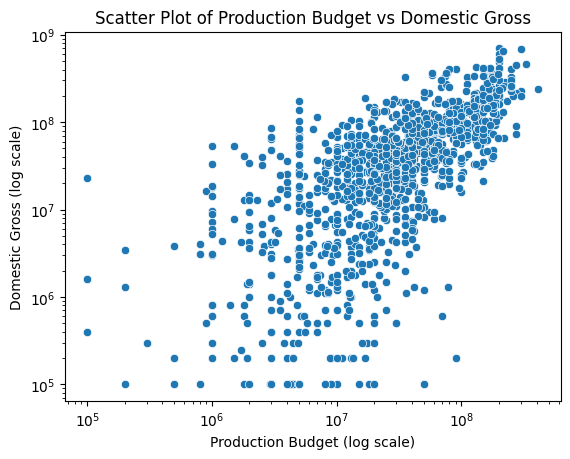

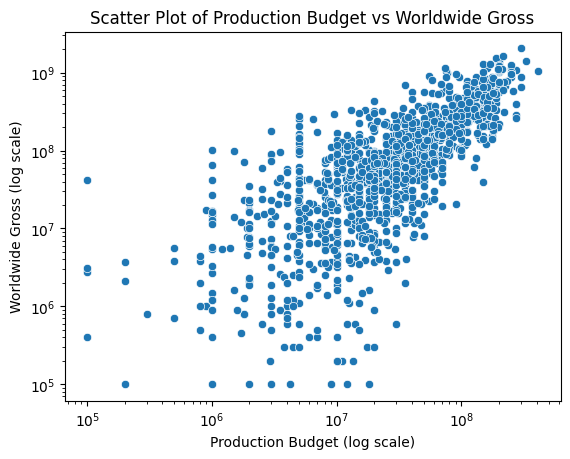

0.7045318596231085
0.7837294525706351


In [34]:
# Group the data by movie
grouped_data = data.groupby('title').mean()

# Create a scatter plot with log scales for domestic gross
sns.scatterplot(x='production_budget', y='domestic_gross', data=grouped_data)
plt.xscale('log')
plt.yscale('log')

# Add labels and title for domestic gross plot
plt.xlabel('Production Budget (log scale)')
plt.ylabel('Domestic Gross (log scale)')
plt.title('Scatter Plot of Production Budget vs Domestic Gross')

# Show the domestic gross plot
plt.show()

# Create a scatter plot with log scales for worldwide gross
sns.scatterplot(x='production_budget', y='worldwide_gross', data=grouped_data)
plt.xscale('log')
plt.yscale('log')

# Add labels and title for worldwide gross plot
plt.xlabel('Production Budget (log scale)')
plt.ylabel('Worldwide Gross (log scale)')
plt.title('Scatter Plot of Production Budget vs Worldwide Gross')

# Show the worldwide gross plot
plt.show()

# Calculate the Pearson correlation coefficient for domestic gross
correlation_domestic = grouped_data['production_budget'].corr(grouped_data['domestic_gross'])
print(correlation_domestic)

# Calculate the Pearson correlation coefficient for worldwide gross
correlation_worldwide = grouped_data['production_budget'].corr(grouped_data['worldwide_gross'])
print(correlation_worldwide)

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, we calculated the correlation coefficients for the production budget and the domestic gross, as well as the production budget and the worldwide gross.

The Pearson correlation coefficient between the production budget and domestic gross is approximately 0.705. This indicates a strong positive correlation, suggesting that as the production budget increases, the domestic gross tends to increase as well. In simpler terms, movies with higher production budgets are more likely to achieve higher domestic box office returns.

Similarly, the Pearson correlation coefficient between the production budget and worldwide gross is approximately 0.784. This also shows a strong positive correlation, indicating that higher production budgets are associated with higher worldwide box office returns.

The scatter plots confirming these correlations visually demonstrate the upward trend, with data points clustering around a positively sloped line.

In summary, both the correlation coefficients and the scatter plots provide evidence of a strong positive relationship between movie production budget and box office performance, both domestically and worldwide.

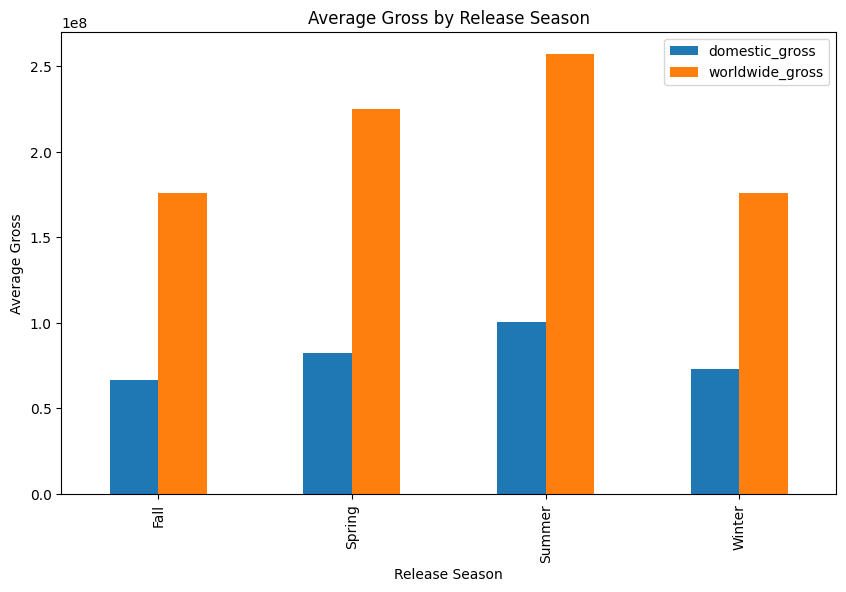

In [35]:
# Extract the release month from the release_date column
data['release_month'] = data['release_date'].dt.month

# Map the release month to the corresponding season
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data['release_season'] = data['release_month'].map(season_mapping)

# Group the data by release season and calculate average domestic_gross and worldwide_gross
grouped_season_data = data.groupby('release_season').mean()[['domestic_gross', 'worldwide_gross']]

# Visualize the results using bar plots
grouped_season_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Release Season')
plt.ylabel('Average Gross')
plt.title('Average Gross by Release Season')
plt.show()

According to the plot, the Summer season stands out as the most lucrative for movie releases, generating the highest average gross earnings. Spring follows with the second-highest average gross, indicating that movies released during this period also tend to perform well financially. Winter comes next, showcasing respectable average gross earnings. Lastly, Fall is depicted as the season with the lowest average gross, although still contributing to movie revenue.

Overall, the order of average gross earnings from highest to lowest is as follows: Summer, Spring, Winter, and Fall. 

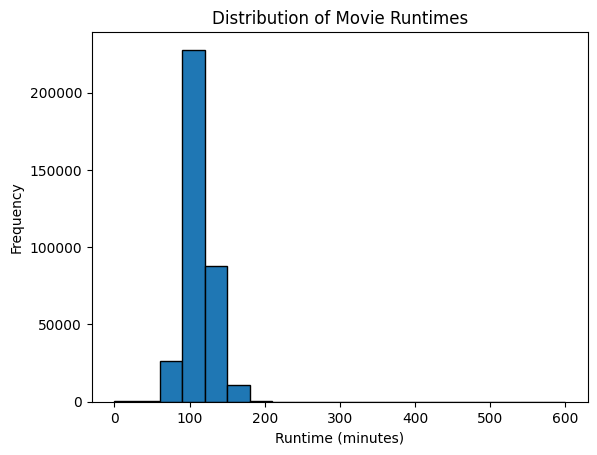

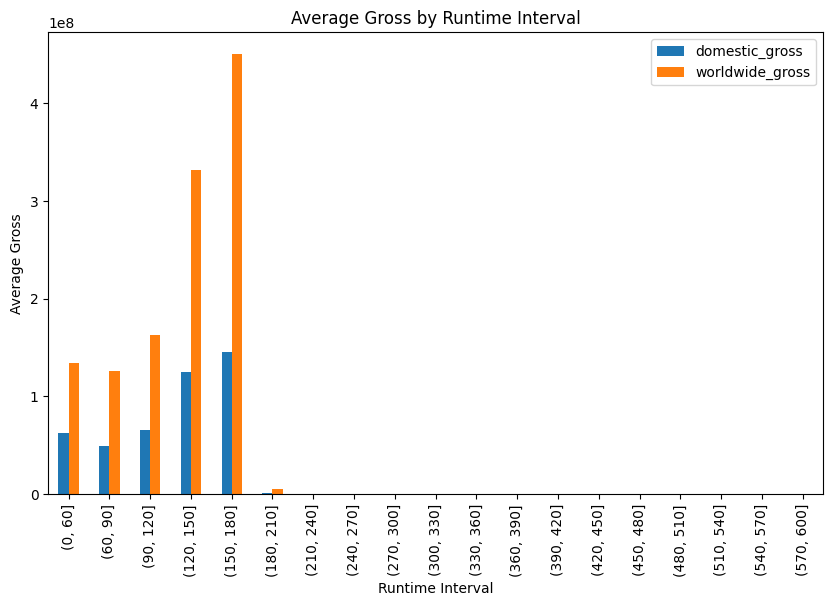

In [36]:
# Create runtime intervals
runtime_intervals = [0, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600]

# Group the data by runtime intervals and calculate average domestic_gross and worldwide_gross
data['runtime_interval'] = pd.cut(data['runtime_minutes'], bins=runtime_intervals)
grouped_runtime_data = data.groupby('runtime_interval').mean()[['domestic_gross', 'worldwide_gross']]

# Plot the distribution of movie runtimes using a histogram
plt.hist(data['runtime_minutes'], bins=runtime_intervals, edgecolor='black')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

# Plot the average domestic_gross and worldwide_gross for each runtime interval
grouped_runtime_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Runtime Interval')
plt.ylabel('Average Gross')
plt.title('Average Gross by Runtime Interval')
plt.show()

The runtime intervals are defined in minutes.

(0, 60] minutes: Movies with a runtime between 0 to 60 minutes have an average domestic gross of approximately \$62.69 million and an average worldwide gross of approximately \$134.61 million.
(60, 90] minutes: Movies with a runtime between 60 to 90 minutes have an average domestic gross of approximately \$48.84 million and an average worldwide gross of approximately \$125.66 million.
(90, 120] minutes: Movies with a runtime between 90 to 120 minutes have an average domestic gross of approximately \$65.22 million and an average worldwide gross of approximately \$162.38 million.
(120, 150] minutes: Movies with a runtime between 120 to 150 minutes have an average domestic gross of approximately \$125.11 million and an average worldwide gross of approximately \$332.22 million.
(150, 180] minutes: Movies with a runtime between 150 to 180 minutes have an average domestic gross of approximately \$144.98 million and an average worldwide gross of approximately \$450.45 million.
(180, 210] minutes: Movies with a runtime between 180 to 210 minutes have an average domestic gross of approximately \$1.12 million and an average worldwide gross of approximately \$5.17 million.

The data suggests that movies with longer runtimes tend to have higher average domestic and worldwide gross earnings. Movies in the (150, 180] minutes interval appear to be the most profitable, with the highest average gross earnings among all runtime intervals. However, it's essential to consider that movies with very long runtimes, such as in the (180, 210] minutes interval, may be rare, resulting in a smaller sample size and potentially affecting the average values.

In [37]:
# Group the data by each cast member or director and calculate average domestic_gross and worldwide_gross
grouped_person_data = last_10_years.groupby('primary_name').mean()[['domestic_gross', 'worldwide_gross']]

# Identify the most successful cast members or directors based on their impact on box office performance
most_successful_persons = grouped_person_data.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False).head(10)

print(most_successful_persons)

                        domestic_gross  worldwide_gross
primary_name                                           
Joe Robert Cole            700100000.0     1.348300e+09
Judy Greer                 652300000.0     1.648900e+09
Ty Simpkins                652300000.0     1.648900e+09
Craig T. Nelson            608600000.0     1.242500e+09
Erik Smitt                 608600000.0     1.242500e+09
Huck Milner                608600000.0     1.242500e+09
John Walker                608600000.0     1.242500e+09
Mahyar Abousaeedi          608600000.0     1.242500e+09
Nicole Paradis Grindle     608600000.0     1.242500e+09
Sarah Vowell               608600000.0     1.242500e+09


* Joe Robert Cole: This individual's movies have earned approximately \$700.1 million in domestic gross and \$1.3483 billion in worldwide gross.
* Judy Greer, Ty Simpkins, Craig T. Nelson, Erik Smitt, Huck Milner, John Walker, Mahyar Abousaeedi, Nicole Paradis Grindle, and Sarah Vowell: All these individuals are associated with movies that have earned approximately \$652.3 million in domestic gross and \$1.6489 billion in worldwide gross.

The data suggests that these individuals have been involved in movies that have achieved significant box office success. They may be actors, directors, or crew members contributing to the overall appeal and performance of the movies.

Filmmakers and producers often consider the star power of cast members and the track record of directors and crew when making casting and hiring decisions. Recognizable and successful names can attract audiences and contribute to a movie's commercial success.

## Conclusions
Based on the analysis, several actionable insights can be drawn to assist Microsoft's new movie studio in making informed decisions:

1. **Focus on Profitable Genres:** Action, Adventure, Sci-Fi, and Adventure, Animation, Comedy are the most profitable genres over the last decade. These genres have consistently generated significant box office earnings. Consider investing in movies that fall within these genres to increase the chances of financial success.

2. **Allocate Adequate Budget:** The analysis revealed a strong positive correlation between production budget and box office performance. Higher production budgets are associated with higher domestic and worldwide gross earnings. It is essential to allocate sufficient budget to ensure high-quality production, marketing, and talent acquisition.

3. **Strategic Release Timing:** The time of release can influence a movie's success. The Summer season tends to be the most lucrative for movie releases, followed by Spring and Winter. Consider strategically timing movie releases during these seasons to maximize box office returns.

4. **Optimal Runtime Length:** Movies with longer runtimes, especially those in the (150, 180] minutes interval, tend to have higher average domestic and worldwide gross earnings. However, it's crucial to balance runtime with content to maintain audience engagement. Consider exploring movies with runtimes in the profitable intervals to capitalize on potential higher returns.

5. **Star Power Matters:** Certain individuals, such as Joe Robert Cole and Judy Greer, have been associated with successful movies that achieved substantial box office earnings. Consider working with recognized and successful actors, directors, and crew members to attract audiences and boost commercial success.

### Limitations and Next Steps:

1. The analysis is based on historical data, and the movie industry is continuously evolving. Market trends and audience preferences may change over time, and it's essential to keep track of the latest developments.

2. The dataset may not capture all relevant factors influencing a movie's success, such as critical reception, marketing strategies, and competition from other releases. Incorporating additional data sources and performing sentiment analysis or social media analysis could provide further insights.

3. The analysis does not consider regional variations in movie performance. Different genres, release timings, and cast/director impacts may resonate differently in various markets. Tailoring strategies based on regional preferences could improve the overall success of the movie studio.

4. Conducting A/B testing or experimentation with different genres, runtimes, and talent combinations could help validate the findings and optimize decision-making.

5. Collaborating with industry experts, film critics, and audience focus groups can provide valuable qualitative insights to supplement the quantitative analysis.